<a href="https://colab.research.google.com/github/LinaTobon/Proyecticos-/blob/main/BankMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank marketing analysis

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/ML_udemy/bank.csv",sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [ ]:
data['education'] = np.where(data['education']=='basic.9y','basic',data['education'])
data['education'] = np.where(data['education']=='basic.6y','basic',data['education'])
data['education'] = np.where(data['education']=='basic.4y','basic',data['education'])
data['education'] = np.where(data['education']=='high.school','high_school',data['education'])
data['education'] = np.where(data['education']=='professional.course','professional_course',data['education'])
data['education'] = np.where(data['education']=='university.degree','university',data['education'])

In [ ]:
# function that will help us to aggregate and obtain the percentage of each level for the categorical variables
def aggregation_feature(feature):
  globals()['df' + str(feature)] = pd.pivot_table(data, index=[feature], 
                       values=['y'], aggfunc={'y': 'count'})
  globals()['df' + str(feature)].rename(columns={'y':'Count'},inplace=True)
  globals()['df' + str(feature)].reset_index(inplace=True)
  globals()['df' + str(feature)]['Perc'] = round((globals()['df' + str(feature)]['Count']/globals()['df' + str(feature)]['Count'].sum())*100,2)
  return globals()['df' + str(feature)]

In [ ]:
def aggregation_feature(feature):
  globals()['df' + str(feature)] = pd.DataFrame(round(data[feature].value_counts()/data[feature].count()*100,2))
  return globals()['df' + str(feature)]

In [ ]:
aggregation_feature('education')
aggregation_feature('y')


,y
no,89.05
yes,10.95


In [ ]:
#cfig = px.bar(test, x='education', y=test.index,title='What is the most common education level?',orientation='h',text='education')
#fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
#fig.show()

In [ ]:
fig = px.pie(dfy, values='y', names=dfy.index, title='How imbalanced is our data?')
fig.show()

In [ ]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [ ]:
data.groupby('y').median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38,165,2,999,0,1.1,93.918,-41.8,4.857,5195.8
yes,39,458,2,999,0,-1.8,93.369,-40.3,1.262,5076.2


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144
high_school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000
professional_course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140
university,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479


Text(0, 0.5, 'Frequency of purchase')

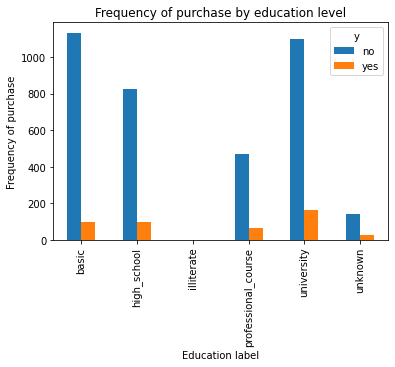

In [ ]:
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Frequency of purchase by education level')
plt.xlabel('Education label')
plt.ylabel('Frequency of purchase')

In [ ]:
px.histogram(data, x='education', barmode='group',title='Frequency of purchase by education level',color='y')

quien mas compra son los universitarios

Text(0.5, 1.0, 'Frequency of ppurchase by marital status')

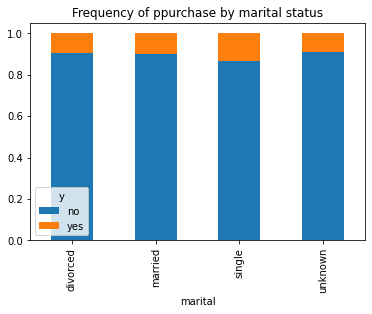

In [ ]:
purchase_marital = pd.crosstab(data.marital,data.y).astype('float')
purchase_marital.div(purchase_marital.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of ppurchase by marital status')

Text(0.5, 1.0, 'Frequency of purchase by day of week')

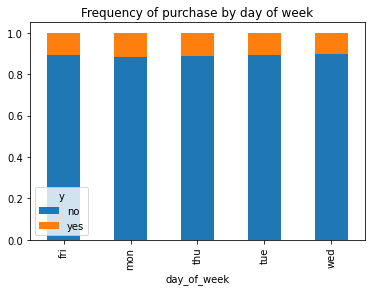

In [ ]:
purchase_day_of_week  = pd.crosstab(data.day_of_week ,data.y).astype('float')
purchase_day_of_week.div(purchase_day_of_week.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of purchase by day of week')

Text(0.5, 1.0, 'Frequency of purchase by day of week')

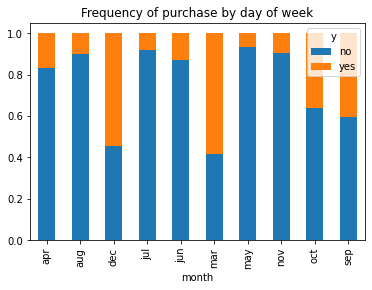

In [ ]:
purchase_month  = pd.crosstab(data.month ,data.y).astype('float')
purchase_month.div(purchase_month.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=True)
plt.title('Frequency of purchase by day of week')

Text(0.5, 1.0, 'Frequency of purchase by month')

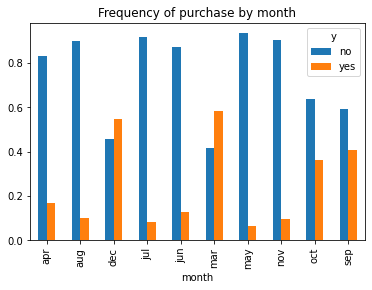

In [ ]:
purchase_month  = pd.crosstab(data.month ,data.y).astype('float')
purchase_month.div(purchase_month.sum(axis=1).astype('float'),axis=0).plot(kind='bar',stacked=False)
plt.title('Frequency of purchase by month')

In [ ]:
px.histogram(data,x='age',color='y',barmode='group')

In [ ]:
px.histogram(data,x='poutcome',barmode='group',color='y')

In [ ]:
features = [col for col in data.columns]
categorical_features = [col for col in features if data.dtypes[col]==np.object and col!="y"]
binary_features = data.nunique()[data.nunique() == 2].keys().tolist()
numerical_features  = [col for col in features if col not in categorical_features]

In [ ]:
for category in categorical_features:
  cat_list = 'cat'+"_"+category
  cat_dumies = pd.get_dummies(data[category],prefix=cat_list)

In [ ]:
data_enc = pd.get_dummies(data, columns=categorical_features)

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_enc['y']= LabelEncoder().fit_transform(data_enc['y'])

In [ ]:
y = data_enc['y']
data_vars = [col for col in data_enc.columns if col != 'y']
X = data_enc[data_vars]

## Features selection

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
data_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic,education_high_school,education_illiterate,education_professional_course,education_university,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
lr = LogisticRegression(solver='liblinear')
rfe = RFE(lr,12)
rfe = rfe.fit(X,y)

In [ ]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True])

In [ ]:
feature_selection = pd.DataFrame(zip(data_vars,rfe.support_,rfe.ranking_),columns= ['var','selected','rank']).sort_values(by='rank')

In [ ]:
selected_vars = list(feature_selection['var'].loc[feature_selection['selected']])

In [ ]:
selected_vars

['poutcome_success',
 'month_jun',
 'month_jul',
 'job_self-employed',
 'month_oct',
 'job_entrepreneur',
 'month_mar',
 'month_dec',
 'month_may',
 'previous',
 'poutcome_failure',
 'euribor3m']

## Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_enc.loc[:,selected_vars],y,test_size=0.3,random_state=0)


## Modeling

In [ ]:
from sklearn import metrics

In [ ]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)



0.9011446409989594

In [ ]:
pd.DataFrame(zip(selected_vars,list(lr.coef_)[0]))

,0,1
0,poutcome_success,1.102155
1,month_jun,0.453085
2,month_jul,0.388414
3,job_self-employed,-0.674854
4,month_oct,0.489708
5,job_entrepreneur,-0.147704
6,month_mar,0.992544
7,month_dec,0.778327
8,month_may,-0.781964
9,previous,0.456945


In [ ]:
lr.intercept_

array([-0.55609047])

los coeficientes indican los cambios en escala logaritmica en el cociente de probabilidades por cada unidad de cambio, por ejemplo:si la variable previous incrementa en una unidad, el logaritmo del cociente de probabilidad se incrementará en 0.45 y por tanto la probabilidad de compra incrementará de forma acorde

In [ ]:
proba = lr.predict_proba(X_test)
# la primera columna que tan seguro estoy de mi prediccion y la segunda la probabilidad de ser clasificado como compra
predictions = lr.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,predictions)

0.9021035598705501

In [ ]:
probs = lr.predict_proba(X_test)[:,1]
prob_df = pd.DataFrame(probs)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold,1,0)
prob_df['actual'] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.066478,0,0
1,0.117406,1,0
2,0.069593,0,0
3,0.062666,0,0
4,0.065086,0,0


In [ ]:
pd.crosstab(prob_df.prediction,columns='count')

col_0,count
prediction,
0,893
1,343


### Matrices de confusion. 
* Numero de positivos reales: $TP +FN$
* Numero de negativos reales: $TN+FP$
* Numero de predicciones correctas: $TP+TN$
* Numero de predicciones incorrectas: $FP+FN$
* Sensibilidad (TPR): $TP/(TP +FN)$
* Especificidad (TNR): $TN/(TN+FP)$. 
El escenario perfecto seria sensibilidad y especificidad del 100%.

### Curvas ROC (Caracteristica Operativa del Receptor)
en 2d muestra en el eje horizontal el ratio de verdaderos positivos y en el eje vertical unos menos la especificidad, para diferentes thresholds.


In [ ]:
from sklearn import metrics

In [ ]:
confussion_matrix = pd.crosstab(prob_df.prediction,prob_df.actual)
TN=confussion_matrix[0][0]
TP=confussion_matrix[1][1]
FN=confussion_matrix[1][0]
FP=confussion_matrix[0][1]
sens = TP/(TP+FN)
espec_1 = 1-(TN/(TN+FP))

In [ ]:
confussion_matrix

actual,0,1
prediction,,
0,847,46
1,267,76


In [ ]:
confussion_matrix[0][1]

267

In [ ]:
espec_1,sensit,thresholds = metrics.roc_curve(y_test,probs)
roc = pd.DataFrame({
    'x':espec_1,
    'y':sensit
})
fig = px.area(roc, x="x", y="y", title='ROC curve')
fig.update_layout(shapes = [{'type': 'line', 'yref': 'paper', 'xref': 'paper', 'y0': 0, 'y1': 1, 'x0': 0, 'x1': 1,'layer': 'below'}])
fig.show()

In [ ]:
auc = metrics.auc(espec_1,sensit)
auc

0.7643516202136739

### Validación cruzada

tecnica para validar los resultados del analisis estadistico y garantizar que son independientes de la partición de los sets de entrenamiento y test. consiste en repetir el experimiento de particion de los datos y calcular la media aritmetica obtenida de las medias de evaluación sobre diferentes particiones.  
* Kfold cross validation:los datos de muestra se dividen en k subconjuntos de forma que uno de los subconjuntos se utiliza para prueba y k-1  subconjuntos en entrenar el modelo. y este se vuelve a repetir pero intercambiando los papeles. hasta llegar a k iteraciones, de modo que todos y cada uno de los posibles subconjuntos actua como prueba y entrenamiento.  

se realiza un unico calculo del errror cometido
$E=\frac{1}{K}\sum_{i=1}^{k} Ei$. 

* Random Cross Validation. 
consiste en dividir aleatoriamente el conjunto de datos de entrenamiento y prueba. en este caso no se sigue ningún patron sino que para cada division la funcion de aproximacion se ajusta a partir de los datos de entrenamiento que sean elegidos y calcula los valores de salida. unas muestras pueden quedar sin evaluar y otras evaluadas varias veces.

* leave one out cross validation. 
separa los datos de manera que para cada iteracion tengamos una sola muestra para los datos de prueba y todo el resto excepto ese sea el conjuto de entrenamiento. Costoso a nivel computacional, itearaciones igual al numero de muestras N. 

$E=\frac{1}{N}\sum_{i=1}^{N} Ei$.


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
X = data_enc.loc[:,selected_vars]

In [ ]:
scores = cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=8)

In [ ]:
scores.mean()